In [2]:
file_prefix <- "ch17.1"
reuse_fit <- T
source("preset.R")

In [3]:
data <- read_csv("data/HtWtData300.csv")
stan_data <- list(
  N = nrow(data), 
  x = data$height, 
  y = data$weight, 
  mean_x = mean(data$height), 
  sd_x = sd(data$height), 
  mean_y = mean(data$weight), 
  sd_y = sd(data$weight)
)

Parsed with column specification:
cols(
  male = col_double(),
  height = col_double(),
  weight = col_double()
)



In [4]:
fit <- stan(file = "model/ch17.1.stan", data = stan_data, seed = 123, 
            pars = (c("nu_minus_one")), include = F, 
            chains = 4, warmup = 300, iter = 5000, thin = 1)

In [5]:
save(fit, file = save_file_name("fit"))
load(file = save_file_name("fit"))

In [6]:
fit

Inference for Stan model: ch17.
4 chains, each with iter=5000; warmup=300; thin=1; 
post-warmup draws per chain=4700, total post-warmup draws=18800.

           mean se_mean    sd     2.5%      25%      50%      75%    97.5%
a[1]    -127.79    0.35 26.60  -180.14  -145.75  -127.79  -109.75   -76.29
a[2]       4.28    0.01  0.40     3.51     4.01     4.28     4.55     5.06
sigma     24.10    0.02  1.65    20.99    22.97    24.05    25.18    27.45
nu         5.52    0.02  1.71     3.22     4.35     5.18     6.32     9.76
log_nu     0.72    0.00  0.12     0.51     0.64     0.71     0.80     0.99
lp__   -1266.29    0.02  1.47 -1269.96 -1267.00 -1265.96 -1265.22 -1264.49
       n_eff Rhat
a[1]    5865    1
a[2]    5873    1
sigma   7336    1
nu      7606    1
log_nu  7518    1
lp__    6319    1

Samples were drawn using NUTS(diag_e) at Wed Jan 15 22:57:41 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split ch

In [7]:
#ggmcmc(ggs(fit), file = plot_file_name("diag"))

In [8]:
# check result
res <- fit_to_tibble(fit)

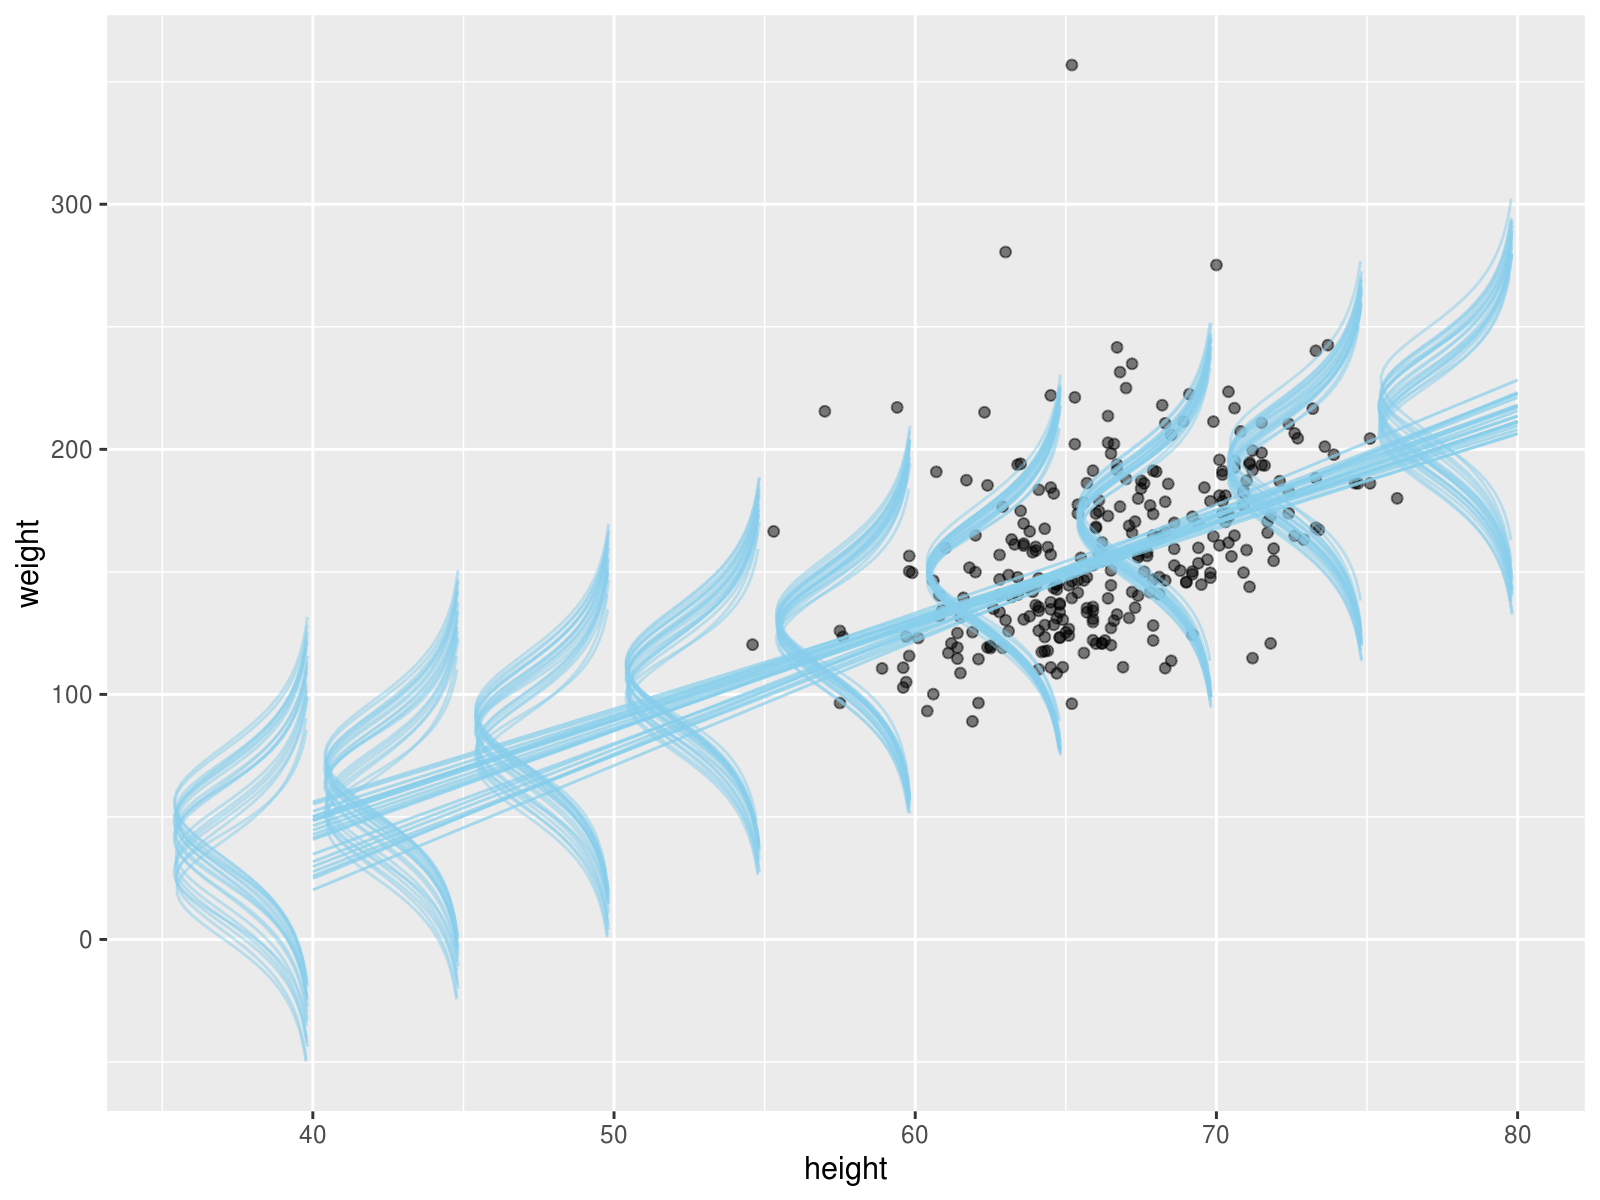

In [13]:
set_plot_size(8, 6)
# plot posteria predictive
line_grid <- res %>% sample_n(20) %>% 
  make_line_grid(xs = seq(40, 80, by = 5), y_func = a_1 + a_2 * height, x_name = "height", y_name = "weight")
dist_grid <- line_grid %>% 
  make_tdist_grid(height, weight, sigma, nu = nu)
ggplot(data, aes(height, weight)) + 
  geom_point(alpha = 0.5) + 
  geom_line(data = line_grid, aes(group = line_id), color = "skyblue", alpha = 0.7) + 
  geom_path(data = dist_grid, aes(XX, YY, group = point_id), color = "skyblue", alpha = 0.5)

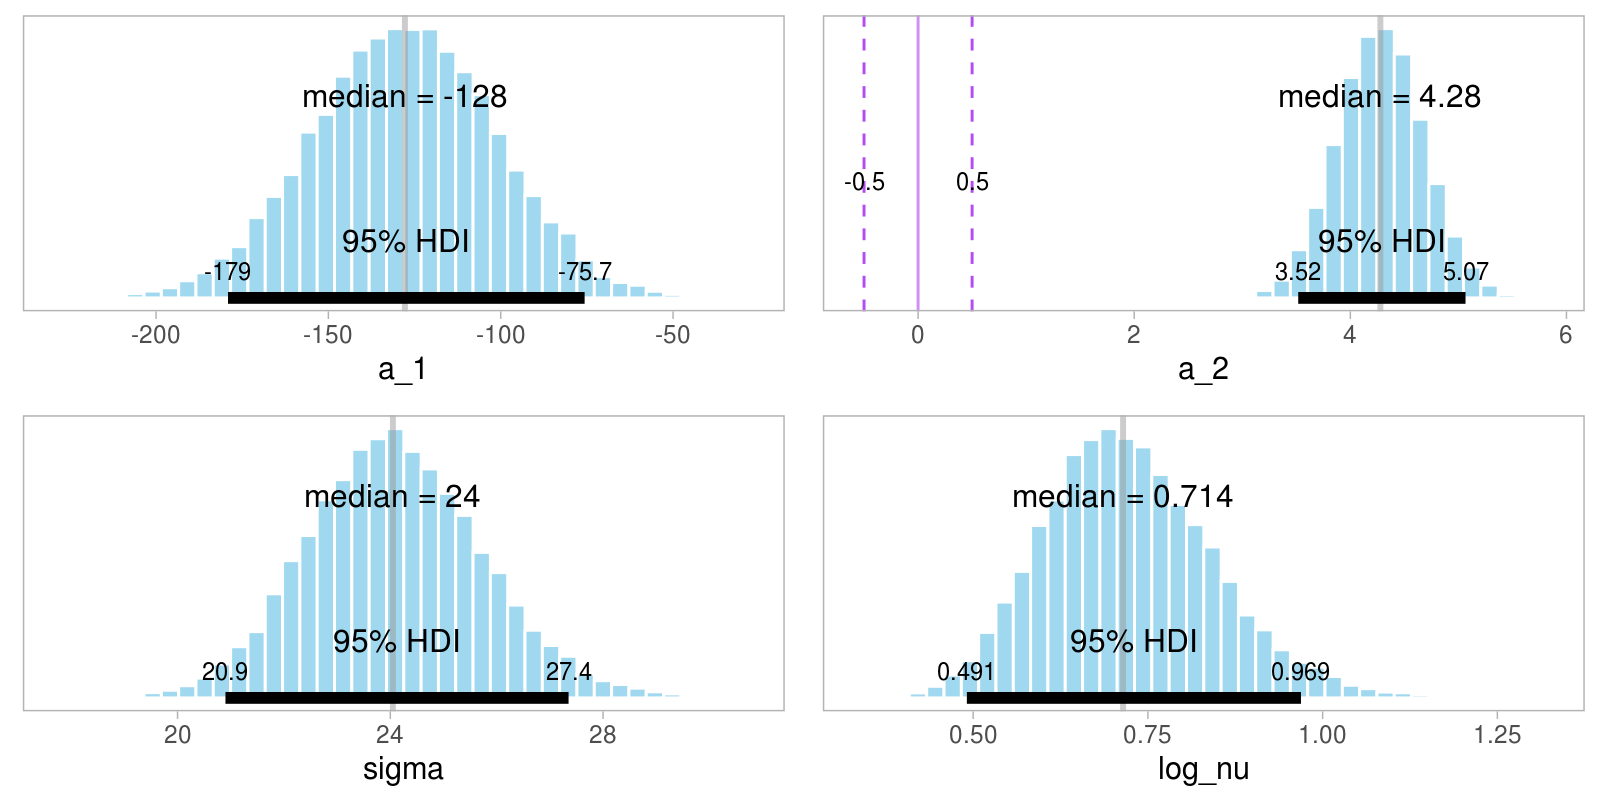

In [12]:
# plot posteria
set_plot_size(8, 4)
grid.arrange(
  plot_post(res, "a_1"), 
  plot_post(res, "a_2", rope = c(-0.5, 0.5)), 
  plot_post(res, "sigma"), 
  plot_post(res, "log_nu")
)